In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import duckdb as ddb
from scipy.stats import skew

In [242]:
df = pd.read_excel('Adidas US Sales Datasets Original.xlsx')
df['Operating Margin'] = df['Operating Margin'].mul(100)
df[['Gender', 'Item']] = df['Product'].str.split("'s", expand=True)
df['Cost'] = df['Total Sales'] - df['Operating Profit']
df = pd.DataFrame(df)

query = "from df where Cost > 0"
df = ddb.query(query).to_df()
df.reset_index(drop=True, inplace=True) 



In [243]:
pd.set_option('display.float_format', lambda x: '{:,.0f}'.format(x))
df.describe()

,Retailer ID,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Cost
count,"9,644",9644,"9,644","9,644","9,644","9,644","9,644","9,644"
mean,"1,173,845",2021-05-10 15:03:48.452923904,45,257,"93,312","34,440",42,"58,873"
min,"1,128,299",2020-01-01 00:00:00,7,6,160,75,10,85
25%,"1,185,732",2021-02-17 00:00:00,35,106,"4,261","1,925",35,"2,229"
50%,"1,185,732",2021-06-04 00:00:00,45,176,"9,581","4,374",41,"4,996"
75%,"1,185,732",2021-09-16 00:00:00,55,350,"150,000","52,062",49,"94,500"
max,"1,197,831",2021-12-31 00:00:00,110,"1,275","825,000","390,000",80,"567,000"
std,"26,365",NaN,15,214,"141,933","54,200",10,"91,484"


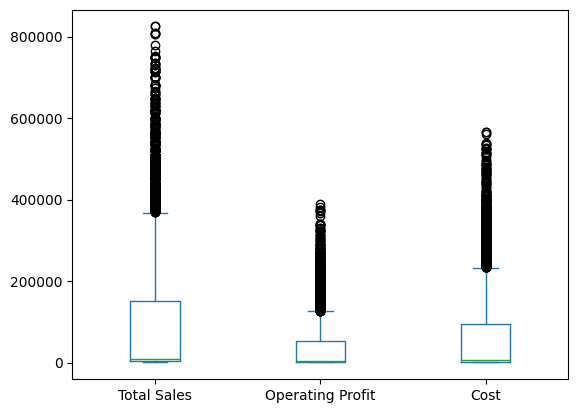

In [244]:
boxplot= df[['Total Sales','Operating Profit', 'Cost']].plot.box()

In [245]:
df.describe(include=['object'])

,Retailer,Region,State,City,Product,Sales Method,Gender,Item
count,9644,9644,9644,9644,9644,9644,9644,9644
unique,6,5,50,52,6,3,2,3
top,Foot Locker,West,Texas,Portland,Men's Street Footwear,Online,Men,Street Footwear
freq,2633,2448,432,360,1610,4887,4826,3218


In [246]:
df['Operating Margin'].value_counts().to_frame()

,count
Operating Margin,
35,1309
40,1290
30,700
50,610
45,364
...,...
12,1
53,1
21,1


Skewness: 0.2277410485694091
The distribution is right-skewed.


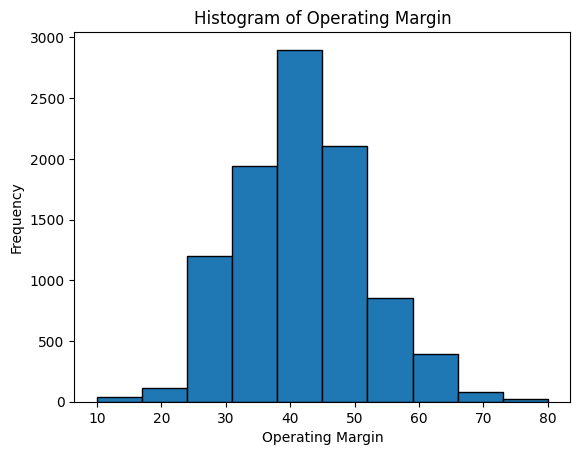

In [247]:
columns = 'Operating Margin'
df[columns].plot.hist(bins=10, edgecolor='black')
plt.title(f'Histogram of {columns}')
plt.xlabel(columns)
plt.ylabel('Frequency')
df[columns].describe()
# Calculate skewness
skewness = skew(df[columns])
print(f"Skewness: {skewness}")

if skewness > 0:
    print("The distribution is right-skewed.")
elif skewness < 0:
    print("The distribution is left-skewed.")
else:
    print("The distribution is symmetric.")

Skewness: 1.8404860113626287
The distribution is right-skewed.


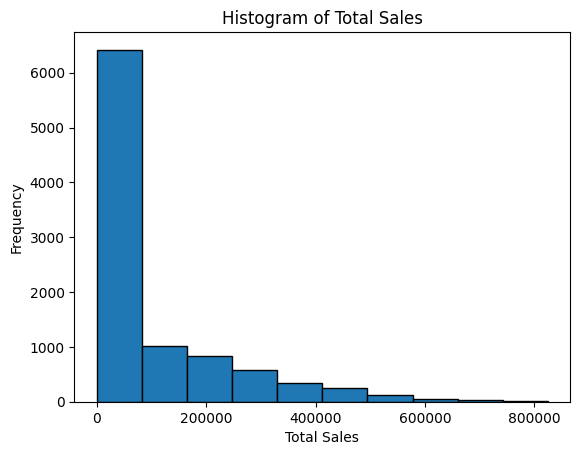

In [248]:
columns = 'Total Sales'
df[columns].plot.hist(bins=10, edgecolor='black')
plt.title(f'Histogram of {columns}')
plt.xlabel(columns)
plt.ylabel('Frequency')
df[columns].describe()
# Calculate skewness
skewness = skew(df[columns])
print(f"Skewness: {skewness}")

if skewness > 0:
    print("The distribution is right-skewed.")
elif skewness < 0:
    print("The distribution is left-skewed.")
else:
    print("The distribution is symmetric.")


Skewness: 0.3617514891356248
The distribution is right-skewed.


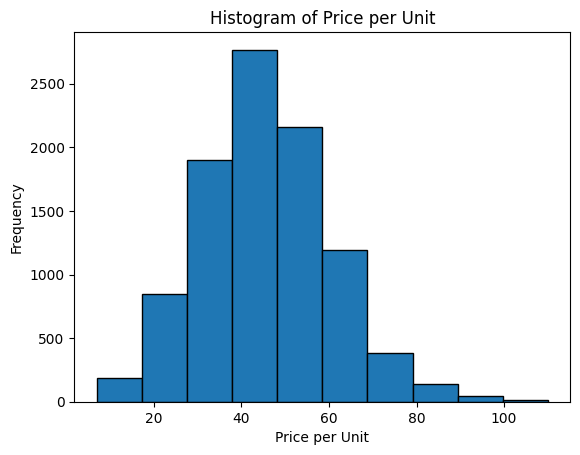

In [249]:
columns = 'Price per Unit'
df[columns].plot.hist(bins=10, edgecolor='black')
plt.title(f'Histogram of {columns}')
plt.xlabel(columns)
plt.ylabel('Frequency')
df[columns].describe()


# Calculate skewness
skewness = skew(df[columns])
print(f"Skewness: {skewness}")

if skewness > 0:
    print("The distribution is right-skewed.")
elif skewness < 0:
    print("The distribution is left-skewed.")
else:
    print("The distribution is symmetric.")

Skewness of Price per Unit: 0.36
The distribution of Price per Unit is right-skewed.

Skewness of Total Sales: 1.84
The distribution of Total Sales is right-skewed.

Skewness of Operating Margin: 0.23
The distribution of Operating Margin is right-skewed.



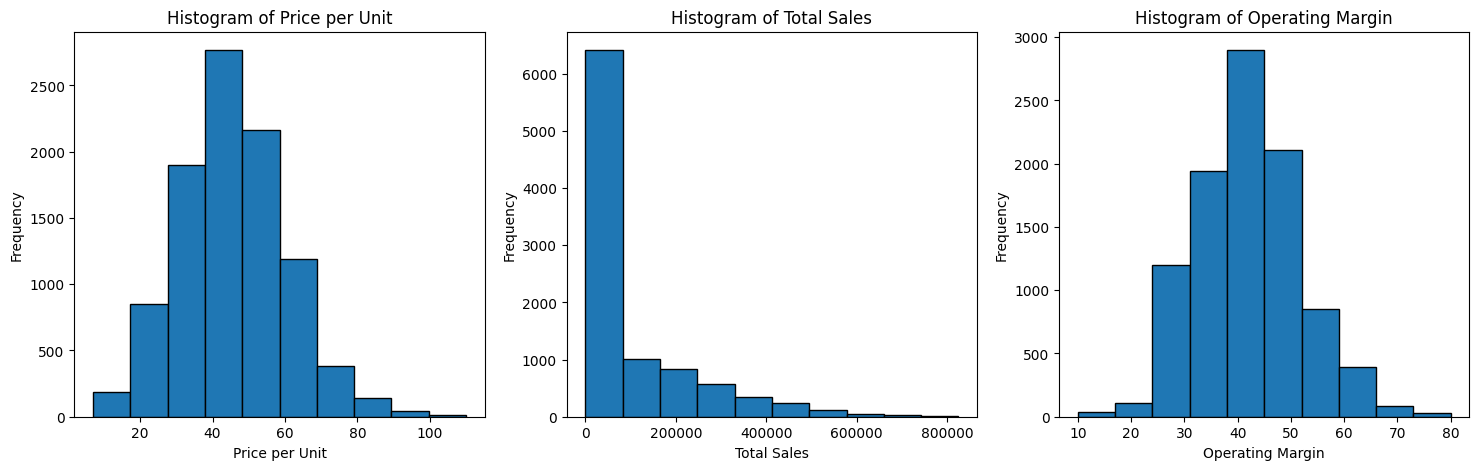

In [250]:
columns = ['Price per Unit', 'Total Sales', 'Operating Margin']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5)) 

for i, col in enumerate(columns):
    df[col].plot.hist(bins=10, edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    skewness = skew(df[col])
    print(f"Skewness of {col}: {skewness:.2f}")
    if skewness > 0:
        print(f"The distribution of {col} is right-skewed.\n")
    elif skewness < 0:
        print(f"The distribution of {col} is left-skewed.\n")
    else:
        print(f"The distribution of {col} is symmetric.\n")

plt.show()

A right-skewed distribution (also known as positively skewed) means that the tail on the right side of the distribution is longer or fatter than the left side. In such a distribution:

1. Most of the data (e.g., Total Sales values) are concentrated on the lower end (to the left), meaning that a majority of the sales are relatively smaller amounts.
2. A few instances of much larger values (outliers) stretch the tail to the right, causing the skew.
3. The mean (average) of the data is usually greater than the median, as the large outliers pull the mean towards the higher end.

In business terms, a right-skewed distribution for Total Sales might indicate that most sales are small or moderate, but there are occasional very large sales that skew the overall data.

# Scatter Plot

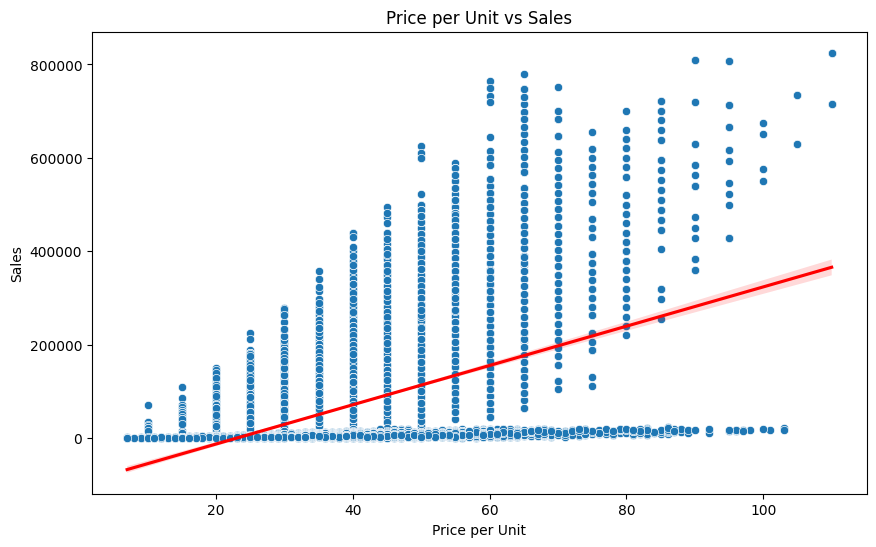

In [251]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price per Unit', y='Total Sales')
sns.regplot(data=df, x='Price per Unit', y='Total Sales', scatter=False, color='red')
plt.title('Price per Unit vs Sales')
plt.xlabel('Price per Unit')
plt.ylabel('Sales')
plt.show()

In [252]:
df['Price per Unit'].describe()
query = """
select "Units Sold","Total Sales", "Price per Unit","Operating Profit","Operating Margin" 
from df where "Total Sales" < 200000 and "Price per Unit" =82
"""
n_df = ddb.query(query).to_df()
print(n_df)

    Units Sold  Total Sales  Price per Unit  Operating Profit  \
0          105        8,610              82             3,358   
1          182       14,924              82             5,373   
2          133       10,906              82             4,144   
3          140       11,480              82             5,970   
4          180       14,760              82             6,347   
5          200       16,400              82             5,740   
6          149       12,218              82             5,620   
7          150       12,300              82             5,289   
8          165       13,530              82             6,494   
9          161       13,202              82             7,261   
10         131       10,742              82             6,230   
11         231       18,942              82             7,009   
12         186       15,252              82             5,033   

    Operating Margin  
0                 39  
1                 36  
2                 38

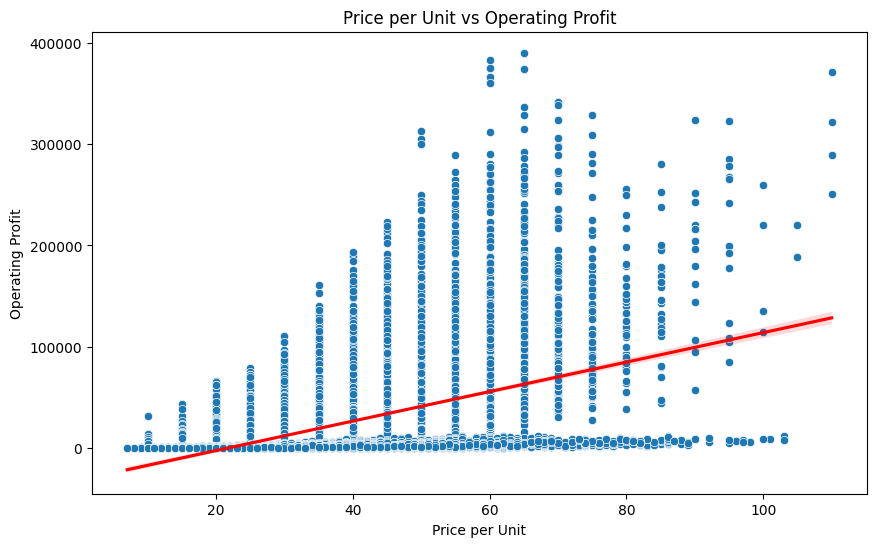

In [253]:
xa='Price per Unit'
ya='Operating Profit'

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=xa, y=ya)
sns.regplot(data=df, x=xa, y=ya, scatter=False, color='red')
plt.title(f'{xa} vs {ya}')
plt.xlabel(xa)
plt.ylabel(ya)
plt.show()


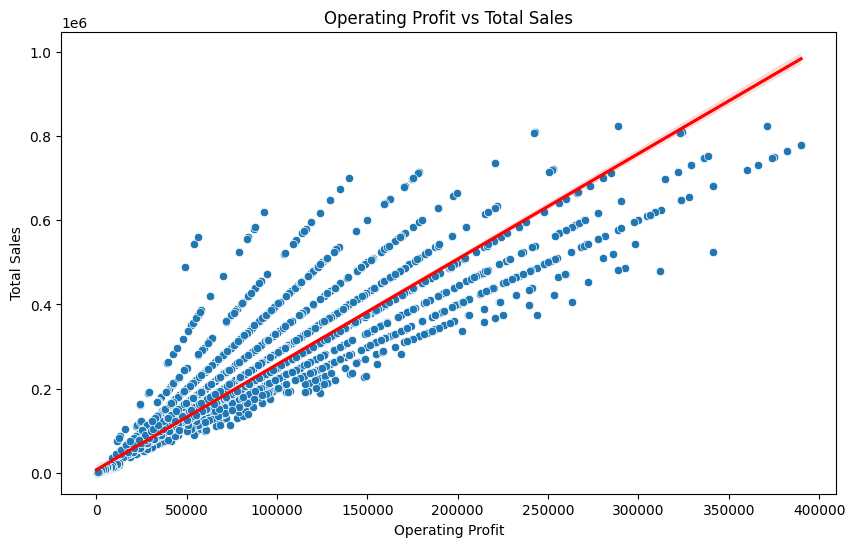

In [254]:
ya='Total Sales'
xa='Operating Profit'

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=xa, y=ya)
sns.regplot(data=df, x=xa, y=ya, scatter=False, color='red')
plt.title(f'{xa} vs {ya}')
plt.xlabel(xa)
plt.ylabel(ya)
plt.show()

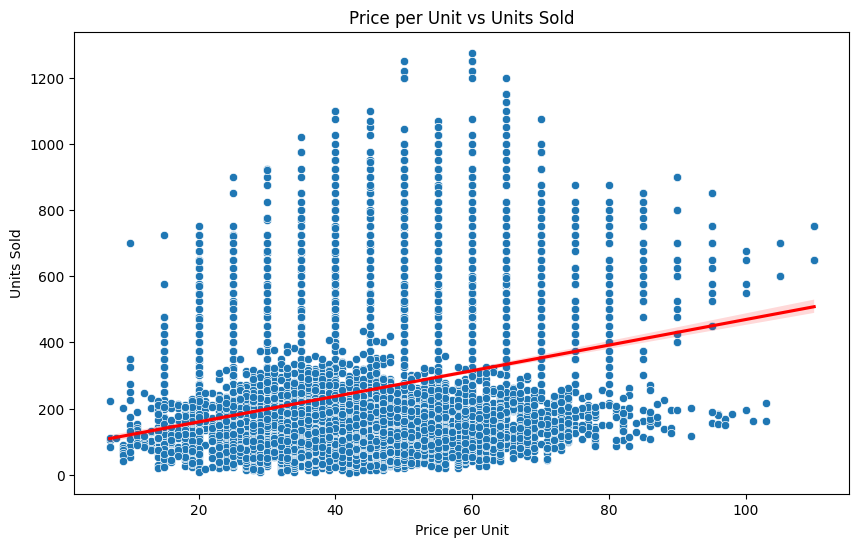

In [255]:
xa='Price per Unit'
ya='Units Sold'

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=xa, y=ya)
sns.regplot(data=df, x=xa, y=ya, scatter=False, color='red')
plt.title(f'{xa} vs {ya}')
plt.xlabel(xa)
plt.ylabel(ya)
plt.show()

In [256]:
df['Price per Unit'].describe()

count   9,644
mean       45
std        15
min         7
25%        35
50%        45
75%        55
max       110
Name: Price per Unit, dtype: float64

In [257]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Gender,Item,Cost
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50,1200,"600,000","300,000",50,In-store,Men,Street Footwear,"300,000"
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50,1000,"500,000","150,000",30,In-store,Men,Athletic Footwear,"350,000"
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40,1000,"400,000","140,000",35,In-store,Women,Street Footwear,"260,000"
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45,850,"382,500","133,875",35,In-store,Women,Athletic Footwear,"248,625"
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60,900,"540,000","162,000",30,In-store,Men,Apparel,"378,000"


In [258]:
low_threshold = 35
mid_threshold = 75

def categorize_price(price):
    if price < low_threshold:
        return '1'
    elif price < mid_threshold:
        return '2'
    else:
        return '3'

df['Price Range'] = df['Price per Unit'].apply(categorize_price)

In [259]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Gender,Item,Cost,Price Range
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50,1200,"600,000","300,000",50,In-store,Men,Street Footwear,"300,000",2
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50,1000,"500,000","150,000",30,In-store,Men,Athletic Footwear,"350,000",2
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40,1000,"400,000","140,000",35,In-store,Women,Street Footwear,"260,000",2
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45,850,"382,500","133,875",35,In-store,Women,Athletic Footwear,"248,625",2
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60,900,"540,000","162,000",30,In-store,Men,Apparel,"378,000",2


In [260]:
df['Price Range'].describe()

count     9644
unique       3
top          2
freq      7145
Name: Price Range, dtype: object

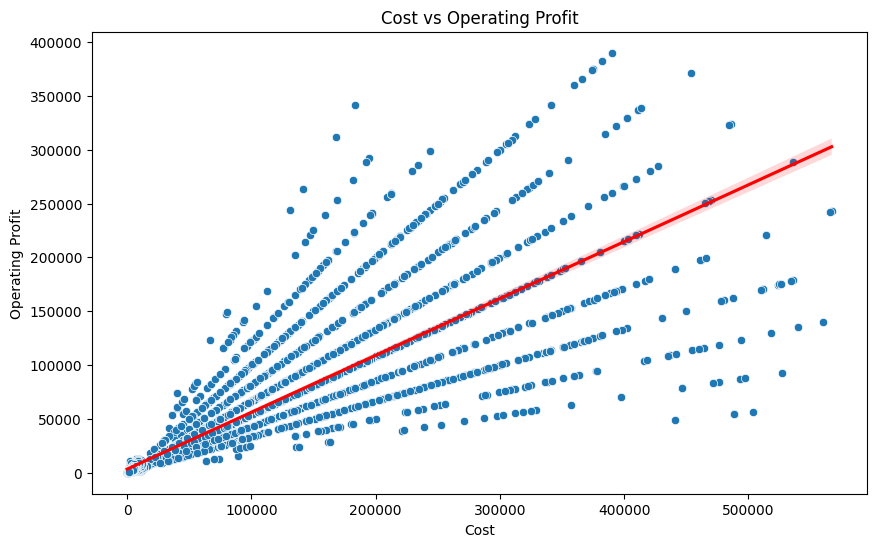

In [261]:
xa='Cost'
ya='Operating Profit'

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=xa, y=ya)
sns.regplot(data=df, x=xa, y=ya, scatter=False, color='red')
plt.title(f'{xa} vs {ya}')
plt.xlabel(xa)
plt.ylabel(ya)
plt.show()

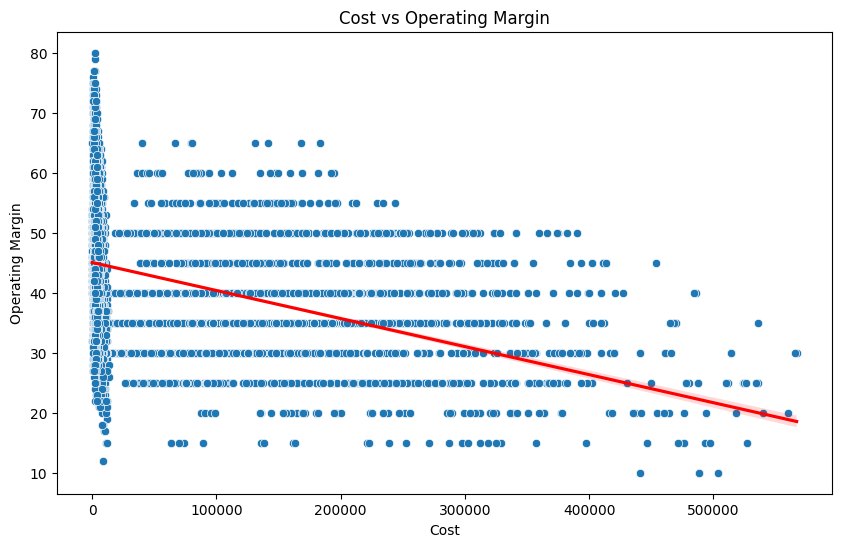

In [262]:
xa='Cost'
ya='Operating Margin'

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=xa, y=ya)
sns.regplot(data=df, x=xa, y=ya, scatter=False, color='red')
plt.title(f'{xa} vs {ya}')
plt.xlabel(xa)
plt.ylabel(ya)
plt.show()

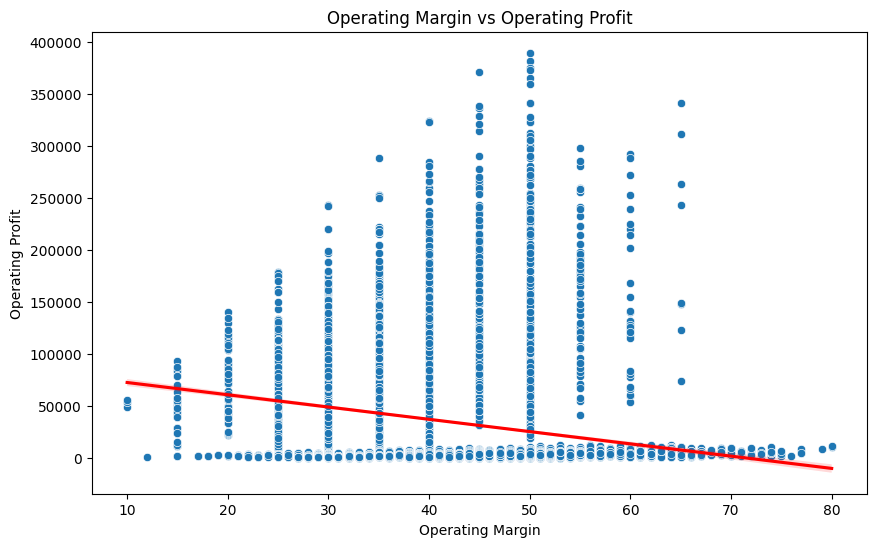

In [263]:
xa='Operating Margin'
ya='Operating Profit'

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=xa, y=ya)
sns.regplot(data=df, x=xa, y=ya, scatter=False, color='red')
plt.title(f'{xa} vs {ya}')
plt.xlabel(xa)
plt.ylabel(ya)
plt.show()

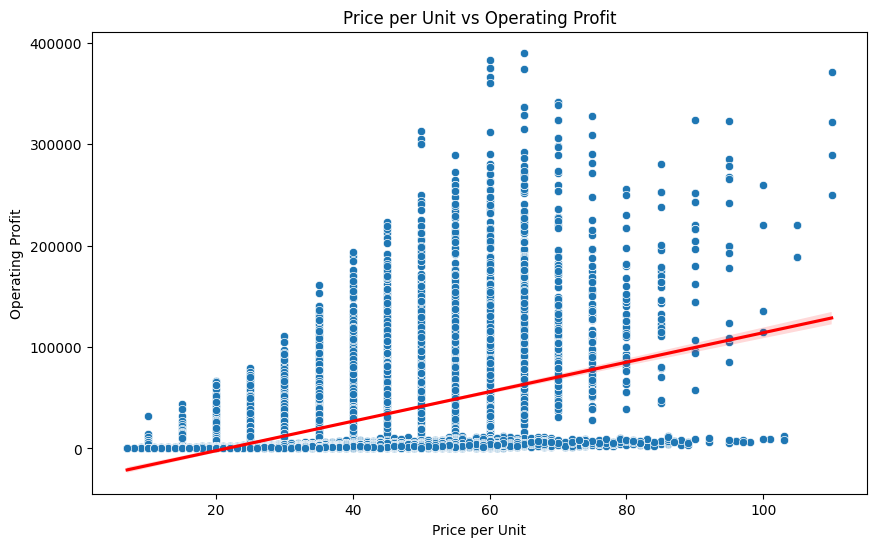

In [264]:
xa='Price per Unit'
ya='Operating Profit'

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=xa, y=ya)
sns.regplot(data=df, x=xa, y=ya, scatter=False, color='red')
plt.title(f'{xa} vs {ya}')
plt.xlabel(xa)
plt.ylabel(ya)
plt.show()

In [265]:
df.describe()

,Retailer ID,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Cost
count,"9,644",9644,"9,644","9,644","9,644","9,644","9,644","9,644"
mean,"1,173,845",2021-05-10 15:03:48.452923904,45,257,"93,312","34,440",42,"58,873"
min,"1,128,299",2020-01-01 00:00:00,7,6,160,75,10,85
25%,"1,185,732",2021-02-17 00:00:00,35,106,"4,261","1,925",35,"2,229"
50%,"1,185,732",2021-06-04 00:00:00,45,176,"9,581","4,374",41,"4,996"
75%,"1,185,732",2021-09-16 00:00:00,55,350,"150,000","52,062",49,"94,500"
max,"1,197,831",2021-12-31 00:00:00,110,"1,275","825,000","390,000",80,"567,000"
std,"26,365",NaN,15,214,"141,933","54,200",10,"91,484"


In [266]:
df.describe(include=object)

,Retailer,Region,State,City,Product,Sales Method,Gender,Item,Price Range
count,9644,9644,9644,9644,9644,9644,9644,9644,9644
unique,6,5,50,52,6,3,2,3,3
top,Foot Locker,West,Texas,Portland,Men's Street Footwear,Online,Men,Street Footwear,2
freq,2633,2448,432,360,1610,4887,4826,3218,7145


Time Series

In [267]:
df=df.sort_values(by='Invoice Date')

In [268]:

# plt.plot(df['Month'], df['Total Sales'])
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Gender,Item,Cost,Price Range
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50,1200,"600,000","300,000",50,In-store,Men,Street Footwear,"300,000",2
499,Foot Locker,1185732,2020-01-01,Northeast,Pennsylvania,Philadelphia,Women's Apparel,75,275,"206,250","61,875",30,Outlet,Women,Apparel,"144,375",3
8199,Foot Locker,1185732,2020-01-01,Northeast,Pennsylvania,Philadelphia,Women's Apparel,53,83,"4,399","1,408",32,Outlet,Women,Apparel,"2,991",2
3886,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,47,336,"15,792","9,633",61,Online,Men,Street Footwear,"6,159",2
7772,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,34,384,"13,056","6,789",52,Outlet,Men,Street Footwear,"6,267",1


In [269]:
"""
Cell generated by Data Wrangler.
"""
from datetime import datetime
import os

def clean_data(df):
    # Derive column 'Month' from column: 'Invoice Date'
    def Month(Invoice_Date):
        """
        Transform based on the following examples:
           Invoice Date    Output
        1: 2020-01-01   => "1"
        2: 2020-02-22   => "2"
        """
        date_format1 = '%-m' if os.name != 'nt' else '%#m'
        return Invoice_Date.strftime(date_format1)
    df.insert(3, "Month", df.apply(lambda row : Month(row["Invoice Date"]), axis=1))
    # Derive column 'Year' from column: 'Invoice Date'
    # Transform based on the following examples:
    #    Invoice Date    Output
    # 1: 2020-01-01   => "2020"
    df.insert(3, "Year", df.apply(lambda row : row["Invoice Date"].strftime("%Y"), axis=1))
    return df

df_clean = clean_data(df.copy())
df_clean.head()

,Retailer,Retailer ID,Invoice Date,Year,Month,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Gender,Item,Cost,Price Range
0,Foot Locker,1185732,2020-01-01,2020,1,Northeast,New York,New York,Men's Street Footwear,50,1200,"600,000","300,000",50,In-store,Men,Street Footwear,"300,000",2
499,Foot Locker,1185732,2020-01-01,2020,1,Northeast,Pennsylvania,Philadelphia,Women's Apparel,75,275,"206,250","61,875",30,Outlet,Women,Apparel,"144,375",3
8199,Foot Locker,1185732,2020-01-01,2020,1,Northeast,Pennsylvania,Philadelphia,Women's Apparel,53,83,"4,399","1,408",32,Outlet,Women,Apparel,"2,991",2
3886,Foot Locker,1185732,2020-01-01,2020,1,Northeast,New York,New York,Men's Street Footwear,47,336,"15,792","9,633",61,Online,Men,Street Footwear,"6,159",2
7772,Foot Locker,1185732,2020-01-01,2020,1,Northeast,New York,New York,Men's Street Footwear,34,384,"13,056","6,789",52,Outlet,Men,Street Footwear,"6,267",1


In [274]:
df_clean['Invoice Date'] = pd.to_datetime(df_clean['Invoice Date'])
df_2020 = df_clean['Year'] == 2020
df_2021 = df_clean['Year'] == 2021
df_2020.head()
# plt.plot(df_2020['Invoice Date'], df_2020['Total Sales'], label='2020')
# plt.plot(df_2021['Invoice Date'], df_2021['Total Sales'], label='2021')


0       False
499     False
8199    False
3886    False
7772    False
Name: Year, dtype: bool

In [286]:
query = """
select Item, sum("Operating Profit") as "Total Profit",sum("Total Sales") as "Total Sales", sum("Cost") as "Cost"
from df_clean group by all
"""
n_df = ddb.query(query).to_df()
print(n_df)

                 Item  Total Profit  Total Sales        Cost
0             Apparel   113,414,001  302,767,492 189,353,491
1   Athletic Footwear    90,822,673  260,305,576 169,482,903
2     Street Footwear   127,898,087  336,829,057 208,930,970


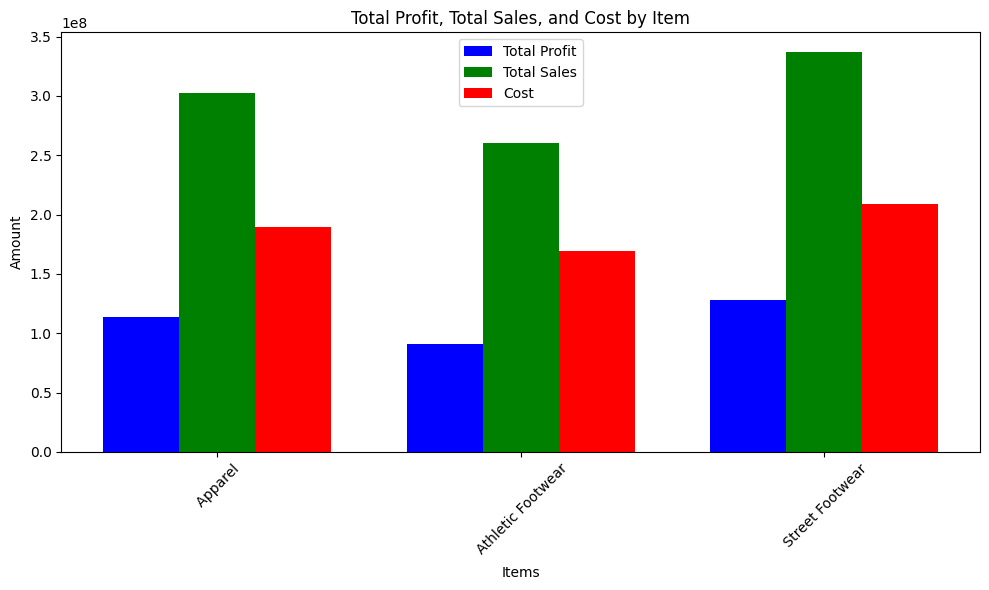

In [287]:

# Sample data from n_df
items = n_df['Item']
total_profit = n_df['Total Profit']
total_sales = n_df['Total Sales']
cost = n_df['Cost']

# Set width of bars and positions
bar_width = 0.25
index = np.arange(len(items))  # the label locations

# Create a figure
plt.figure(figsize=(10, 6))

# Create bars for each value
plt.bar(index, total_profit, bar_width, label='Total Profit', color='blue')
plt.bar(index + bar_width, total_sales, bar_width, label='Total Sales', color='green')
plt.bar(index + 2 * bar_width, cost, bar_width, label='Cost', color='red')

# Add labels and title
plt.xlabel('Items')
plt.ylabel('Amount')
plt.title('Total Profit, Total Sales, and Cost by Item')

# Add xticks on the middle of the group bars
plt.xticks(index + bar_width, items)

# Add legend
plt.legend()

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


In [305]:
query = """
select Region, sum("Operating Profit") as "Total Profit",sum("Total Sales") as "Total Sales", sum("Cost") as "Cost"
from df_clean 
group by all
order by "Total Profit" asc
"""
n_df = ddb.query(query).to_df()
print(n_df)

      Region  Total Profit  Total Sales        Cost
0    Midwest    52,811,346  135,800,459  82,989,113
1  Southeast    60,555,417  163,171,236 102,615,819
2      South    61,138,004  144,663,181  83,525,177
3  Northeast    68,020,588  186,324,067 118,303,479
4       West    89,609,407  269,943,182 180,333,775


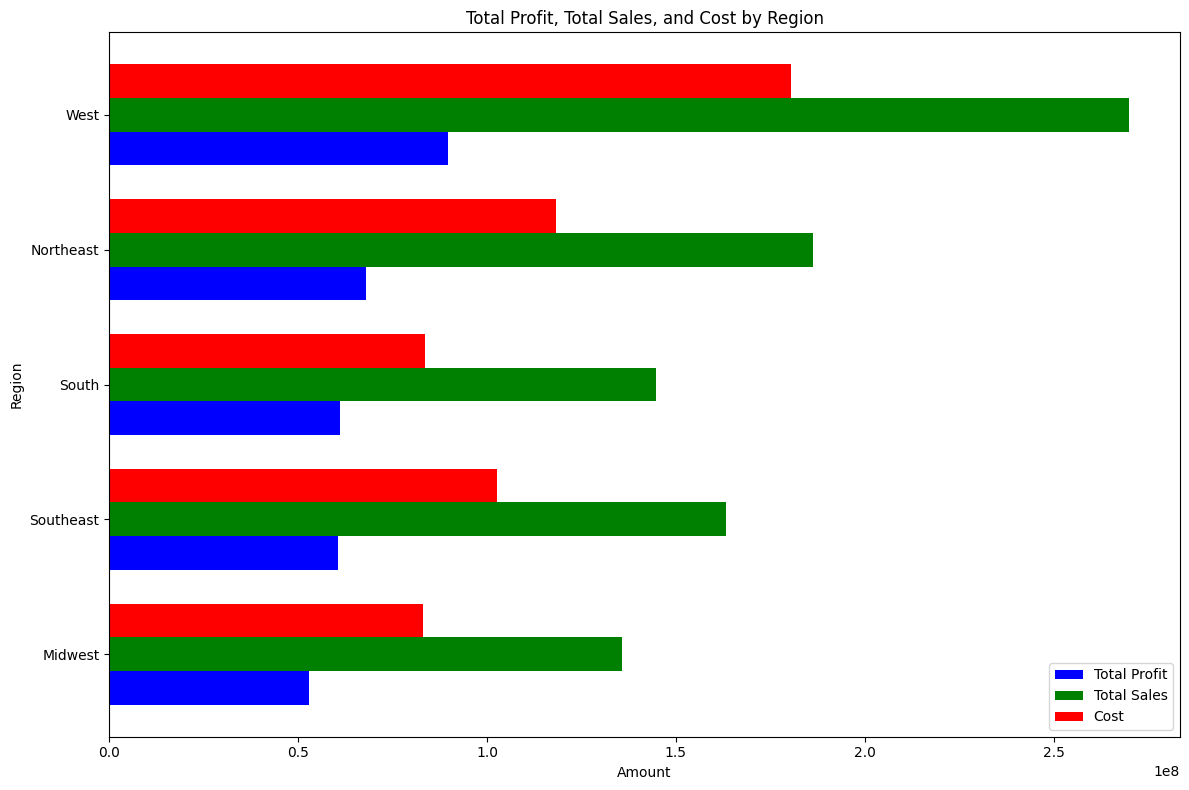

In [306]:

# Sample data from n_df
Region = n_df['Region']
total_profit = n_df['Total Profit']
total_sales = n_df['Total Sales']
cost = n_df['Cost']


# Set width of bars and positions
bar_width = 0.25
index = np.arange(len(Region))  # the y-axis locations

# Create a figure
plt.figure(figsize=(12, 8))

# Create horizontal bars for each value
plt.barh(index - bar_width, total_profit, bar_width, label='Total Profit', color='blue')
plt.barh(index, total_sales, bar_width, label='Total Sales', color='green')
plt.barh(index + bar_width, cost, bar_width, label='Cost', color='red')

# Add labels and title
plt.xlabel('Amount')
plt.ylabel('Region')
plt.title('Total Profit, Total Sales, and Cost by Region')

# Add yticks on the middle of the group bars
plt.yticks(index, Region)

# Add legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()